In [ ]:
# Code to unzip a TAR file on Windows
import tarfile 
# open file 
file = tarfile.open('202201_Viajes_GAU.tar.') # zipped folder containing all data (typically in .tar format)
# extracting file 
file.extractall('./basicos_GAU_viajes_202201') # unzipped folder containing several files
file.close() 

In [1]:
import config as cfg
import os
import pandas as pd
from utils import get_overview, open_gz

In [2]:
geometria_dir = cfg.GEOMETRIA_DATA
personas_dir = cfg.PERSONAS_DATA
viajes_dir = cfg.VIAJES_DATA

In [3]:
personas = personas_dir/'basicos_municipios_personas_202201' # personas folder
viajes = viajes_dir/'basicos_municipios_viajes_202201' # viajes folder

In [4]:
# FIXME: Figure out how to open OD_rutas ('Error tokenizing data')
rutas = pd.read_csv(geometria_dir/'20220801_calidad_rutas.csv', encoding='latin1', sep=';')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\rqg886\\Desktop\\THESIS\\mobility_data\\GEOMETRIA\\20220801_calidad_rutas.csv'

In [9]:
rutas

,segmentsID,ligeros,trips,veh_inf,veh_sup,abs_deviation,relative_deviation
0,ii{`Gd{qUen@_K ci}`GnoqUtzAjX,20103,20378.854,6792.951333,20378.854,13310.048667,0.662093
1,cfc{Fhe}KeDy|F a`e{FhqpKdx@~sK,8946,6410.931,2136.977000,6410.931,6809.023000,0.761125
2,_thpFp~pJd[{`D m_hpF|nkJq[|eC ykepFhyvIihBjdY ...,15945,14166.913,4722.304333,14166.913,11222.695667,0.703838
3,_xshFpf}Tk`Bu|@ uhuhFva|Ttj@~V uhuhFva|TtOm@,17933,15201.167,5067.055667,15201.167,12865.944333,0.717445
4,_lzsFxr`Y|PhxF aazsFjegYkKicF ejzsFlefYbOteA i...,29774,19738.294,6579.431333,19738.294,23194.568667,0.779021
5,sg|fGh{rp@xoCu~M }h|fGbstp@bqCovO s|wfG|{cp@ul...,14647,11450.613,3816.871000,11450.613,10830.129000,0.739409


In [37]:
# get_overview(viajes)

In [5]:
viajes_13 = open_gz(viajes, 13)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\rqg886\\Desktop\\THESIS\\mobility_data\\VIAJES\\basicos_municipios_viajes_202201'

In [13]:
viajes_13['destino'].value_counts().head(25)

destino
28079    188803
08019    161407
46250    105814
41091     77620
29067     63306
30030     60392
48020     57544
08015     53728
18087     52590
08187     50396
03014     48348
08101     47856
50297     47055
47186     45636
08279     44956
31201     39772
36057     39673
20069     39428
07040     39221
28065     39077
28074     38781
38038     38016
43148     37598
15030     37541
03065     37130
Name: count, dtype: int64

In [17]:
# madrid = viajes_13[viajes_13['origen'].str.contains("28079") & viajes_13['destino'].str.contains("28079")]
madrid = viajes_13[viajes_13['origen'].str.startswith("28") & viajes_13['destino'].str.startswith("28")]


In [18]:
len(madrid)

967807

In [23]:
subset = madrid.tail(25)

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

In [25]:
subset

,fecha,periodo,origen,destino,distancia,actividad_origen,actividad_destino,estudio_origen_posible,estudio_destino_posible,residencia,renta,edad,sexo,viajes,viajes_km
11239367,20220114,23,28903,28903,2-10,no_frecuente,casa,no,no,28,>15,45-65,mujer,21.710,68.207
11239368,20220114,23,28903,28903,2-10,no_frecuente,casa,no,no,28,>15,65-100,hombre,2.475,7.087
11239369,20220114,23,28903,28903,2-10,no_frecuente,casa,no,no,28,>15,65-100,mujer,8.018,18.891
11239370,20220114,23,28903,28903,2-10,no_frecuente,frecuente,no,no,28,10-15,45-65,hombre,2.173,4.879
11239371,20220114,23,28903,28903,2-10,no_frecuente,frecuente,no,no,28,10-15,NaN,NaN,3.041,6.183
11239372,20220114,23,28903,28903,2-10,no_frecuente,frecuente,no,no,28,>15,65-100,mujer,4.009,8.129
11239373,20220114,23,28903,28903,2-10,no_frecuente,frecuente,no,no,39,10-15,25-45,NaN,4.456,9.839
11239374,20220114,23,28903,28903,2-10,no_frecuente,no_frecuente,no,no,28,10-15,25-45,hombre,3.311,7.989
11239375,20220114,23,28903,28903,2-10,no_frecuente,no_frecuente,no,no,28,10-15,45-65,hombre,2.173,8.232
11239376,20220114,23,28903,28903,2-10,no_frecuente,no_frecuente,no,no,28,10-15,45-65,mujer,2.456,7.387


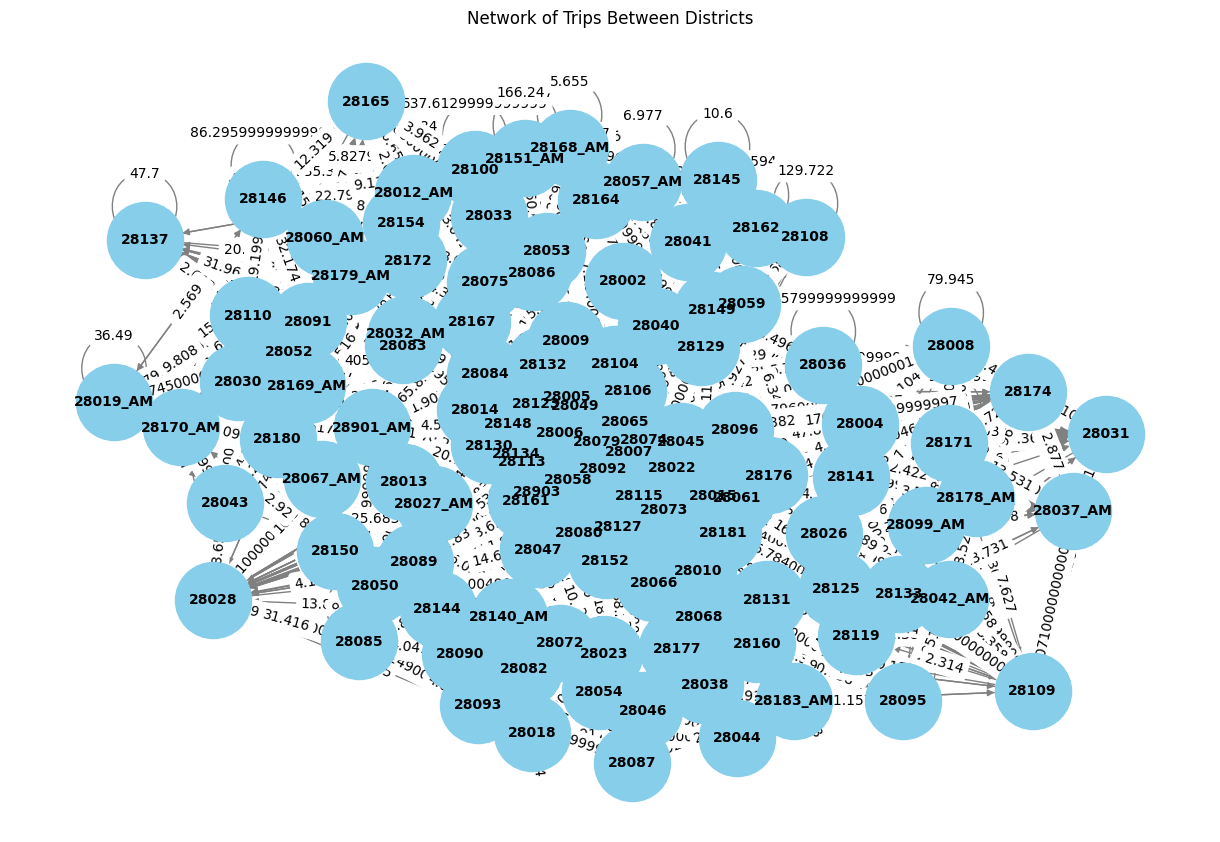

In [26]:
agg_data = madrid.groupby(['origen', 'destino', 'sexo', 'renta']).agg({'viajes': 'sum'}).reset_index()

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for _, row in agg_data.iterrows():
    origen = row['origen']
    destino = row['destino']
    sexo = row['sexo']
    renta = row['renta']
    viajes = row['viajes']
    
    # Add nodes
    if origen not in G:
        G.add_node(origen, label=origen)
    if destino not in G:
        G.add_node(destino, label=destino)
    
    # Add edge with attributes
    if G.has_edge(origen, destino):
        G[origen][destino]['viajes'] += viajes
    else:
        G.add_edge(origen, destino, viajes=viajes, sexo=sexo, renta=renta)

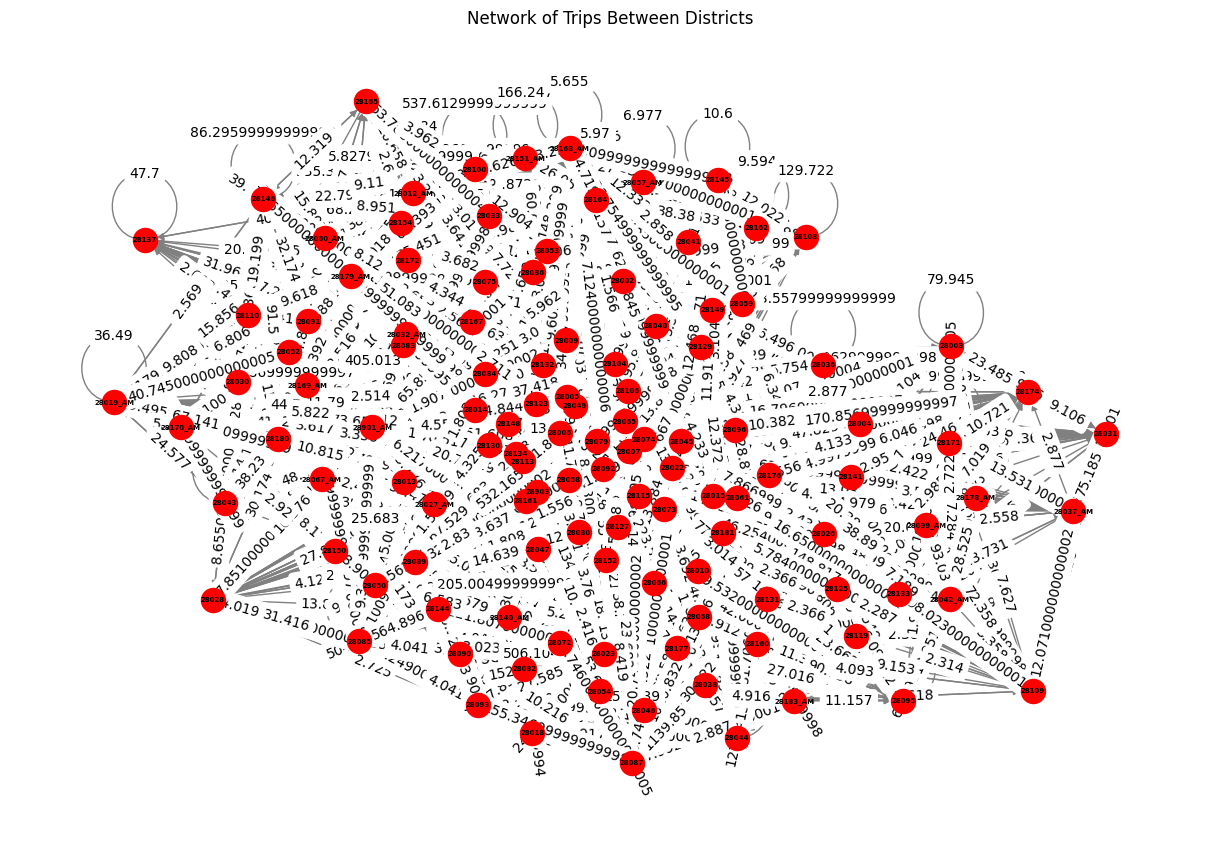

In [27]:
# Plot the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=300, node_color="red", font_size=5, font_weight="bold", edge_color="gray")

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'viajes')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Network of Trips Between Districts')
plt.show()